## Python Data Science Toolbox (Part 2)

## [Iterator, Iterable, Generator](http://friberry.com/?p=254)

### Iterating

In [1]:
import pandas as pd

In [2]:
flist = ['targaryen', 'stark', 'baratheon', 'tully', 'lannister', 'tyrell', 'martell']
alist = ['dragon','wolf','deer','fish','lion','rose','sun']
nlist = ['대너리스','에다드','로버트','브린덴','제이미','로라스','도란'];

In [3]:
for item in flist:
    print(item)

targaryen
stark
baratheon
tully
lannister
tyrell
martell


In [4]:
# make iterator from list
superspeed = iter(flist)

print(next(superspeed))
print(next(superspeed))
print(next(superspeed))

targaryen
stark
baratheon


In [5]:
small_value = iter(range(3))

print(next(small_value))
print(next(small_value))
print(next(small_value))

0
1
2


In [6]:
googol = iter(range(10 ** 1000))   # big number - may not work

print(next(googol))
print(next(googol))

0
1


###  enumerate

In [7]:
enumlist = list(enumerate(flist))   # list of tuple
print(enumlist)

[(0, 'targaryen'), (1, 'stark'), (2, 'baratheon'), (3, 'tully'), (4, 'lannister'), (5, 'tyrell'), (6, 'martell')]


In [8]:
for index1, value1 in enumlist:    # unpack tuple
    print(index1, value1)

0 targaryen
1 stark
2 baratheon
3 tully
4 lannister
5 tyrell
6 martell


In [9]:
for index2, value2 in enumerate(flist, start = 1):   # Change the start index
    print(index2, value2)

1 targaryen
2 stark
3 baratheon
4 tully
5 lannister
6 tyrell
7 martell


### zip

In [10]:
m_data = list(zip(nlist, flist, alist))
print(m_data)

[('대너리스', 'targaryen', 'dragon'), ('에다드', 'stark', 'wolf'), ('로버트', 'baratheon', 'deer'), ('브린덴', 'tully', 'fish'), ('제이미', 'lannister', 'lion'), ('로라스', 'tyrell', 'rose'), ('도란', 'martell', 'sun')]


In [11]:
m_zip = zip(nlist, flist, alist)   # create zip object

print(m_zip)

for value1, value2, value3 in m_zip:   # unzip
    print(value1, value2, value3)

대너리스 targaryen dragon
에다드 stark wolf
로버트 baratheon deer
브린덴 tully fish
제이미 lannister lion
로라스 tyrell rose
도란 martell sun


In [12]:
# unzip (*)
m_zip = zip(nlist, flist, alist) 
print(*m_zip)

('대너리스', 'targaryen', 'dragon') ('에다드', 'stark', 'wolf') ('로버트', 'baratheon', 'deer') ('브린덴', 'tully', 'fish') ('제이미', 'lannister', 'lion') ('로라스', 'tyrell', 'rose') ('도란', 'martell', 'sun')


In [13]:
m_zip = zip(nlist, flist, alist) 
result1, result2, result3 = zip(*m_zip)  # unzip to tuple
print(result2)
print(flist)
print(result2 == flist)   # Check if unpacked tuples are equivalent to original tuples

('targaryen', 'stark', 'baratheon', 'tully', 'lannister', 'tyrell', 'martell')
['targaryen', 'stark', 'baratheon', 'tully', 'lannister', 'tyrell', 'martell']
False


### iteration by chunk

In [14]:
counts_dict = {}

# Iterate over the file chunk by chunk
for chunk in pd.read_csv('data/tweets.csv', chunksize = 10):
    # Iterate over the column in dataframe
    for entry in chunk.lang:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

print(counts_dict)

{'en': 222, 'et': 24, 'kr': 12, 'jp': 36, 'ru': 6}


In [15]:
# count entry function with chunksize

In [16]:
def count_entries(csv_file, c_size, colname):
    """Return a dictionary with counts of ccurrences as value for each key."""
    
    counts_dict = {}

    for chunk in pd.read_csv(csv_file, chunksize=c_size):
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    return counts_dict

In [17]:
result_counts = count_entries('data/tweets.csv', 10, 'lang')
print(result_counts)

{'en': 222, 'et': 24, 'kr': 12, 'jp': 36, 'ru': 6}


# List comprehensions

In [18]:
squares = [i**2 for i in range(10)]

In [19]:
# Create a 5 x 5 matrix using a list of lists
matrix = [[col for col in range(5)] for row in range(5)]

for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [20]:
# conditionals in comprehensions

In [21]:
new_fellowship = [member for member in flist if len(member) >= 7]
print(new_fellowship)

['targaryen', 'baratheon', 'lannister', 'martell']


In [22]:
new_fellowship = [member if len(member) >= 7 else '' for member in flist]
print(new_fellowship)

['targaryen', '', 'baratheon', '', 'lannister', '', 'martell']


In [23]:
# tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

In [24]:
# Dict comprehensions

In [25]:
new_fellowship = {member:len(member) for member in flist}
print(new_fellowship)

{'targaryen': 9, 'stark': 5, 'baratheon': 9, 'tully': 5, 'lannister': 9, 'tyrell': 6, 'martell': 7}


## Generator : Lazy evaluation

In [26]:
# Create a generator object
lengths = (len(person) for person in flist)

for value in lengths:
    print(value)

9
5
9
5
9
6
7


In [27]:
# [num for num in range(10**10000000)]  -- 대용량 데이터일 경우 문제 발생

In [28]:
# (num for num in range(10**100000))   # generator 객체 만든 후 요청시에만 처리되기 때문에 대용량 데이터 처리시 안전.

### Dictionary by zip

In [29]:
# 2개의 list 를 dictionary로 만드는 함수

In [30]:
def lists2dict(list1, list2):
    """list1 provides the keys and list2 provides the values."""

    zipped_lists = zip(list1, list2)
    rs_dict = dict(zipped_lists)
    return rs_dict

In [31]:
fa_dict = lists2dict(alist, flist)
fa_dict

{'dragon': 'targaryen',
 'wolf': 'stark',
 'deer': 'baratheon',
 'fish': 'tully',
 'lion': 'lannister',
 'rose': 'tyrell',
 'sun': 'martell'}

### list + list   >  dictionary   >   dataframe

In [32]:
feature_names = ['familyname','firstname','crest']

In [33]:
row_list = []
m_zip = zip(flist, nlist, alist)

for value1, value2, value3 in m_zip:
    item = (value1, value2, value3)
    row_list.append(item)
    
row_list

[('targaryen', '대너리스', 'dragon'),
 ('stark', '에다드', 'wolf'),
 ('baratheon', '로버트', 'deer'),
 ('tully', '브린덴', 'fish'),
 ('lannister', '제이미', 'lion'),
 ('tyrell', '로라스', 'rose'),
 ('martell', '도란', 'sun')]

In [34]:
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_list]
list_of_dicts

[{'familyname': 'targaryen', 'firstname': '대너리스', 'crest': 'dragon'},
 {'familyname': 'stark', 'firstname': '에다드', 'crest': 'wolf'},
 {'familyname': 'baratheon', 'firstname': '로버트', 'crest': 'deer'},
 {'familyname': 'tully', 'firstname': '브린덴', 'crest': 'fish'},
 {'familyname': 'lannister', 'firstname': '제이미', 'crest': 'lion'},
 {'familyname': 'tyrell', 'firstname': '로라스', 'crest': 'rose'},
 {'familyname': 'martell', 'firstname': '도란', 'crest': 'sun'}]

In [35]:
df_game = pd.DataFrame(list_of_dicts)
df_game

,crest,familyname,firstname
0,dragon,targaryen,대너리스
1,wolf,stark,에다드
2,deer,baratheon,로버트
3,fish,tully,브린덴
4,lion,lannister,제이미
5,rose,tyrell,로라스
6,sun,martell,도란


## Python generators for streaming data

* Use a generator to load a file line by line.
* Works on streaming data.
* Read and process the file until all lines are exhausted.

### 일반적인 방법

In [36]:
# Open a connection to the file
with open('data/movielens_ratings.csv') as file:

    file.readline()   # Skip the column names
    
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column:  userid
        first_col = line[0]

        # userId 별 평점 부여 횟수
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

print(counts_dict)

{'1': 20, '2': 76, '3': 51, '4': 204, '5': 100, '6': 44, '7': 88, '8': 116, '9': 45, '10': 46, '11': 38, '12': 61, '13': 53, '14': 20, '15': 38}


### Large file인 경우 처리방법

In [37]:
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data

In [38]:
counts_dict = {}
counts = 0

with open('data/movielens_ratings.csv') as file:
    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):
        counts += 1
        if counts >= 1000:
            break
            
        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1
            
print(counts_dict)

{'userId': 1, '1': 20, '2': 76, '3': 51, '4': 204, '5': 100, '6': 44, '7': 88, '8': 116, '9': 45, '10': 46, '11': 38, '12': 61, '13': 53, '14': 20, '15': 36}


### iterator to load data in chunks

In [39]:
file_reader = pd.read_csv('data/movielens_ratings.csv', chunksize=1000)  

# Get the first dataframe chunk
df_reader = next(file_reader)

In [40]:
df_reader.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### iterator to load data in chunks 2

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('data/ind_pop_data.csv', chunksize=1000)

# Get the first dataframe chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'AFG']
df_pop_ceb.head()

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio
0,Afghanistan,AFG,1960,8990000.0,8.22
1,Afghanistan,AFG,1961,9160000.0,8.51
2,Afghanistan,AFG,1962,9340000.0,8.81
3,Afghanistan,AFG,1963,9530000.0,9.11
4,Afghanistan,AFG,1964,9730000.0,9.43


In [43]:
# Zip dataframe columns of interest: pops
pops = zip(df_pop_ceb['TotalPop'], df_pop_ceb['UrbanPopRatio'])

# Turn zip object into list: pops_list
pops_list = list(pops)
len(pops_list)

56

In [44]:
pd.options.mode.chained_assignment = None   # ignore warning.

In [45]:
# Use list comprehension to create new dataframe column 'Total Urban Population'
df_pop_ceb['TotalUrbanPopulation'] = [int(tup[0] * tup[1]) for tup in pops_list]
df_pop_ceb.head()

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio,TotalUrbanPopulation
0,Afghanistan,AFG,1960,8990000.0,8.22,73897800
1,Afghanistan,AFG,1961,9160000.0,8.51,77951600
2,Afghanistan,AFG,1962,9340000.0,8.81,82285400
3,Afghanistan,AFG,1963,9530000.0,9.11,86818300
4,Afghanistan,AFG,1964,9730000.0,9.43,91753900


Text(0.5, 1.0, 'Afghanistan')

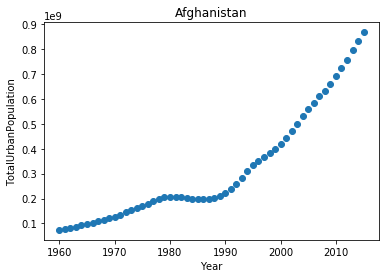

In [46]:
# Plot urban population data
plt.scatter(df_pop_ceb['Year'], df_pop_ceb['TotalUrbanPopulation'])
plt.xlabel('Year')
plt.ylabel('TotalUrbanPopulation')
plt.title('Afghanistan')